<h1 align="center">Búsqueda de la ruta más optima para personas en condición de silla de ruedas por medio de grafos</h1>

<p>El siguiente código es para dibujar los grafos de dificultad y distancia de los caminos que conectan diferentes puntos de la universidad</p>

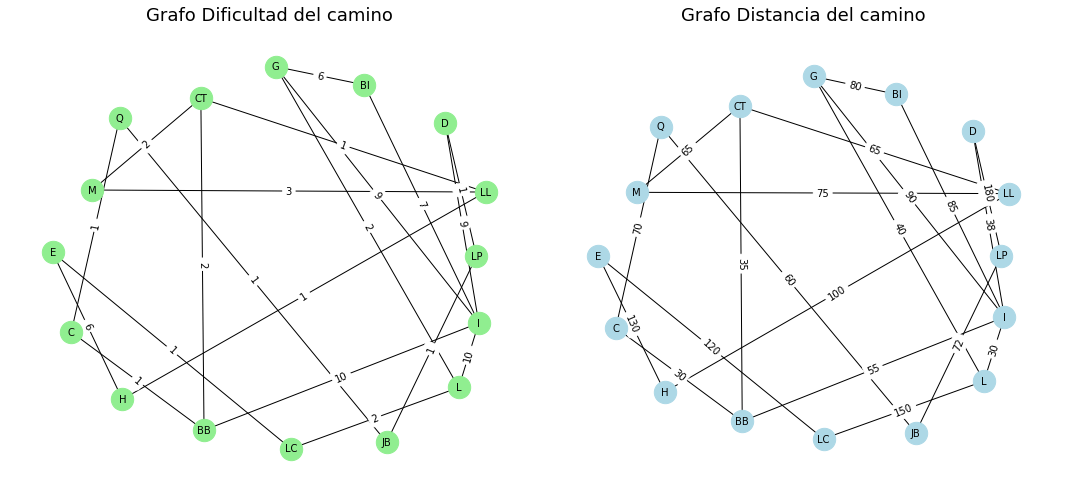

In [123]:
import networkx as nx
import matplotlib.pyplot as plt

# crear el grafo
nodes = ["E",
         "LC",
         "H",
         "BB",
         "C",
         "Q",
         "JB",
         "LP",
         "LL",
         "CT",
         "M",
         "I",
         "D",
         "L",
         "G",
         "BI"
        ]
edgesDificultad = [("E","LC",1), ("H","E",6), ("BB","C",1), ("C","Q",1), ("Q","JB",1),
                   ("JB","LP",1), ("H","LL",1), ("LL","CT",1), ("LL","M",3), ("M","CT",2),
                   ("BB","I",10), ("I","D",9), ("LC","L",2), ("G","I",9), ("L","G",2),
                   ("L","I",10), ("LP","D",1), ("G","BI",6), ("I","BI",7), ("CT","BB",2)
                  ]

edgesDistancia = [("E","LC",120), ("H","E",130), ("BB","C",30), ("C","Q",70), ("Q","JB",60),
                   ("JB","LP",72), ("H","LL",100), ("LL","CT",65), ("LL","M",75), ("M","CT",65),
                   ("BB","I",55), ("I","D",38), ("LC","L",150), ("G","I",90), ("L","G",40),
                   ("L","I",30), ("LP","D",180), ("G","BI",80), ("I","BI",85), ("CT","BB",35)
                  ]

# grafo de dificultad del camino
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edgesDificultad)

#Grafo de distancias
D = nx.Graph()
D.add_nodes_from(nodes)
D.add_weighted_edges_from(edgesDistancia)


## DIBUJAR:

plt.subplots(nrows=1, ncols=2, figsize=(15, 7)) # Layout de varios grafos

# Dibujar grafo dificultad
plt.subplot(121)
plt.title('Grafo Dificultad del camino', fontsize=18)
pos = nx.spring_layout(G, seed=9, k = 20 ) 

nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightgreen")
nx.draw_networkx_edges(G, pos, width=1, min_source_margin=1 )


labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, labels)
plt.axis("off")
ax.margins(0.08)

# Dibujar grafo distancias
plt.subplot(122)
plt.title('Grafo Distancia del camino', fontsize=18)

pos = nx.spring_layout(D, seed=9, k = 20 ) 

nx.draw_networkx_nodes(D, pos, node_size=500, node_color="lightblue")
nx.draw_networkx_edges(D, pos, width=1, min_source_margin=1 )

labels = nx.get_edge_attributes(D,'weight')
nx.draw_networkx_labels(D, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edge_labels(D, pos, labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()